<a href="https://colab.research.google.com/github/blackpandaapkm/Facial-Emotion-Recognition-using-CNN---BLACK-PAND/blob/main/Facial_Emotion_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/knowledge/unziped/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/dataset/knowledge/unziped/test.csv")
df_icml=pd.read_csv("/content/drive/MyDrive/dataset/knowledge/unziped/icml_face_data.csv")


In [ ]:
print(df.shape)
print(df_test.shape)
print(df_icml.shape)

(28709, 2)
(7178, 1)
(35887, 3)


In [ ]:
df.head()


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
df_test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
df_test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
print(df_icml.columns.tolist())

['emotion', ' Usage', ' pixels']


In [ ]:
df_icml.rename(columns = {' Usage':'usage'}, inplace = True)
df_icml.rename(columns = {' pixels':'pixels'}, inplace = True)

In [ ]:
df_icml["usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
print(np.sum(df_icml["usage"]=="Training"))
print(np.sum(df_icml["usage"]=="PublicTest"))
print(np.sum(df_icml["usage"]=="PrivateTest"))

28709
3589
3589


In [ ]:
df_icml = df_icml.loc[df_icml['usage'].isin(['PublicTest', 'PrivateTest'])]
df_icml.shape

(7178, 3)

In [ ]:
df_icml

,emotion,usage,pixels
28709,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,PublicTest,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,PublicTest,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [ ]:
print(df["emotion"].unique())

[0 2 4 6 3 5 1]


In [ ]:
X = df['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(28709, 48, 48, 1)

In [ ]:
y = df["emotion"]
y.shape

(28709,)

In [ ]:
emotion = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')

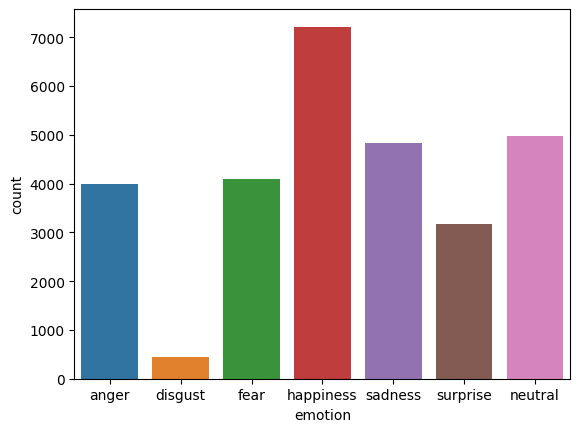

In [ ]:
sns.countplot(x=y)
plt.xticks(range(7), emotion);

Text(0.5, 1.0, 'happiness')

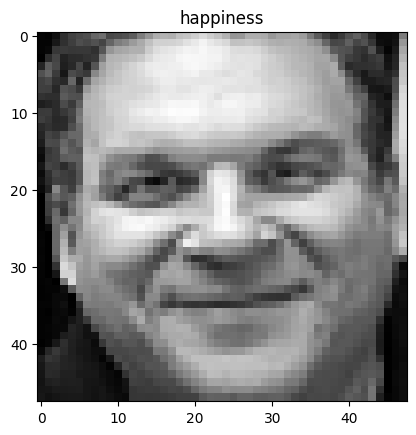

In [ ]:
plt.imshow(X[14].reshape((48,48)), cmap='gray')
plt.title(emotion[y[14]])


Text(0.5, 1.0, 'neutral')

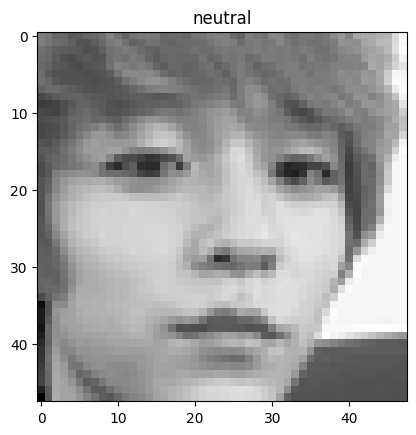

In [ ]:
plt.imshow(X[13].reshape((48,48)), cmap='gray')
plt.title(emotion[y[13]])


In [ ]:
le = LabelEncoder()
img_labels = le.fit_transform(y)
img_labels = to_categorical(img_labels)
img_labels.shape

(28709, 7)

In [ ]:
X.shape,img_labels.shape

((28709, 48, 48, 1), (28709, 7))

In [ ]:
X = X/255.

In [ ]:
X

array([[[[0.27450982],
         [0.3137255 ],
         [0.32156864],
         ...,
         [0.20392157],
         [0.16862746],
         [0.16078432]],

        [[0.25490198],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862746],
         [0.21176471],
         ...,
         [0.19215687],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490198],
         [0.16470589],
         ...,
         [0.28235295],
         [0.21960784],
         [0.16862746]],

        [[0.3019608 ],
         [0.32156864],
         [0.30980393],
         ...,
         [0.4117647 ],
         [0.27450982],
         [0.18039216]],

        [[0.3019608 ],
         [0.28235295],
         [0.32941177],
         ...,
         [0.41568628],
         [0.42745098],
         [0.32156864]]],


       [[[0.5921569 ],
         [0.5882353 ],
         [0.57

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64,kernel_size = (5, 5),input_shape = (48, 48, 1),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64,kernel_size = (5, 5),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))


model.add(Flatten(name='flatten'))
model.add(Dense(512,activation='relu',kernel_initializer='he_normal',))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(7,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
gen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True
)
gen.fit(X)

In [ ]:
X

array([[[[0.27450982],
         [0.3137255 ],
         [0.32156864],
         ...,
         [0.20392157],
         [0.16862746],
         [0.16078432]],

        [[0.25490198],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862746],
         [0.21176471],
         ...,
         [0.19215687],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490198],
         [0.16470589],
         ...,
         [0.28235295],
         [0.21960784],
         [0.16862746]],

        [[0.3019608 ],
         [0.32156864],
         [0.30980393],
         ...,
         [0.4117647 ],
         [0.27450982],
         [0.18039216]],

        [[0.3019608 ],
         [0.28235295],
         [0.32941177],
         ...,
         [0.41568628],
         [0.42745098],
         [0.32156864]]],


       [[[0.5921569 ],
         [0.5882353 ],
         [0.57

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

In [ ]:
img_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y = img_labels
for train_index, test_index in skf.split(X, y.argmax(1)):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    history = model.fit(X_train_fold, y_train_fold,epochs=5,callbacks=callbacks,batch_size=32)
    lst_accu_stratified.append(model.evaluate(X_test_fold, y_test_fold))

    plt.show()

Epoch 1/5
808/808 [==============================] - ETA: 0s - loss: 2.0243 - accuracy: 0.2957

808/808 [==============================] - 50s 36ms/step - loss: 2.0243 - accuracy: 0.2957 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 1.5266 - accuracy: 0.4186

808/808 [==============================] - 28s 35ms/step - loss: 1.5265 - accuracy: 0.4186 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 1.3346 - accuracy: 0.4870

808/808 [==============================] - 28s 35ms/step - loss: 1.3345 - accuracy: 0.4871 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 1.2362 - accuracy: 0.5314

808/808 [==============================] - 28s 35ms/step - loss: 1.2361 - accuracy: 0.5313 - lr: 0.0010
Epoch 5/5
808/808 [==============================] - ETA: 0s - loss: 1.1745 - accuracy: 0.5565

90/90 [==============================] - 2s 16ms/step - loss: 1.2320 - accuracy: 0.5399
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 1.1264 - accuracy: 0.5742

808/808 [==============================] - 29s 35ms/step - loss: 1.1265 - accuracy: 0.5742 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 1.0744 - accuracy: 0.5999

808/808 [==============================] - 29s 36ms/step - loss: 1.0748 - accuracy: 0.5999 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 1.0280 - accuracy: 0.6178

808/808 [==============================] - 29s 36ms/step - loss: 1.0282 - accuracy: 0.6177 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.9822 - accuracy: 0.6363

808/808 [==============================] - 29s 36ms/step - loss: 0.9825 - accuracy: 0.6362 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.9222 - accuracy: 0.6605

90/90 [==============================] - 1s 9ms/step - loss: 1.0579 - accuracy: 0.6019
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.9311 - accuracy: 0.6536

808/808 [==============================] - 29s 36ms/step - loss: 0.9313 - accuracy: 0.6536 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.8504 - accuracy: 0.6868

808/808 [==============================] - 29s 36ms/step - loss: 0.8503 - accuracy: 0.6869 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.7729 - accuracy: 0.7181

808/808 [==============================] - 29s 36ms/step - loss: 0.7727 - accuracy: 0.7181 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.7194 - accuracy: 0.7394

808/808 [==============================] - 29s 36ms/step - loss: 0.7195 - accuracy: 0.7393 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.6501 - accuracy: 0.7667

90/90 [==============================] - 1s 11ms/step - loss: 0.8967 - accuracy: 0.7092
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.6382 - accuracy: 0.7726

808/808 [==============================] - 29s 36ms/step - loss: 0.6381 - accuracy: 0.7726 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.5632 - accuracy: 0.7983

808/808 [==============================] - 29s 36ms/step - loss: 0.5631 - accuracy: 0.7984 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.8169

808/808 [==============================] - 29s 36ms/step - loss: 0.5085 - accuracy: 0.8168 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.4706 - accuracy: 0.8340

808/808 [==============================] - 29s 36ms/step - loss: 0.4707 - accuracy: 0.8340 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.4136 - accuracy: 0.8518

90/90 [==============================] - 1s 10ms/step - loss: 0.5847 - accuracy: 0.7868
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.4905 - accuracy: 0.8282

808/808 [==============================] - 29s 36ms/step - loss: 0.4906 - accuracy: 0.8281 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.3896 - accuracy: 0.8632

808/808 [==============================] - 29s 36ms/step - loss: 0.3896 - accuracy: 0.8631 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.3492 - accuracy: 0.8776

808/808 [==============================] - 29s 35ms/step - loss: 0.3491 - accuracy: 0.8777 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.3273 - accuracy: 0.8866

808/808 [==============================] - 29s 36ms/step - loss: 0.3272 - accuracy: 0.8866 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.8956

90/90 [==============================] - 1s 11ms/step - loss: 0.3480 - accuracy: 0.8833
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.3333 - accuracy: 0.8855

808/808 [==============================] - 29s 36ms/step - loss: 0.3335 - accuracy: 0.8854 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.2888 - accuracy: 0.8982

808/808 [==============================] - 29s 36ms/step - loss: 0.2888 - accuracy: 0.8982 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9097

808/808 [==============================] - 29s 36ms/step - loss: 0.2613 - accuracy: 0.9096 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.3027 - accuracy: 0.8943

808/808 [==============================] - 29s 36ms/step - loss: 0.3027 - accuracy: 0.8943 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.9105

90/90 [==============================] - 1s 10ms/step - loss: 0.2686 - accuracy: 0.9206
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.2667 - accuracy: 0.9071

808/808 [==============================] - 29s 36ms/step - loss: 0.2666 - accuracy: 0.9070 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.9159

808/808 [==============================] - 29s 36ms/step - loss: 0.2442 - accuracy: 0.9159 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.9157

808/808 [==============================] - 29s 35ms/step - loss: 0.2441 - accuracy: 0.9157 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.2057 - accuracy: 0.9305

808/808 [==============================] - 29s 36ms/step - loss: 0.2059 - accuracy: 0.9305 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9316

90/90 [==============================] - 1s 11ms/step - loss: 0.2319 - accuracy: 0.9439
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.2367 - accuracy: 0.9194

808/808 [==============================] - 29s 36ms/step - loss: 0.2366 - accuracy: 0.9194 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9289

808/808 [==============================] - 29s 36ms/step - loss: 0.2076 - accuracy: 0.9289 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9367

808/808 [==============================] - 29s 36ms/step - loss: 0.1831 - accuracy: 0.9367 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.9362

808/808 [==============================] - 29s 36ms/step - loss: 0.1836 - accuracy: 0.9361 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.1782 - accuracy: 0.9394

90/90 [==============================] - 1s 10ms/step - loss: 0.1209 - accuracy: 0.9627
Epoch 1/5
807/808 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9337

808/808 [==============================] - 29s 36ms/step - loss: 0.1970 - accuracy: 0.9337 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9368

808/808 [==============================] - 29s 36ms/step - loss: 0.1880 - accuracy: 0.9369 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.1612 - accuracy: 0.9451

808/808 [==============================] - 29s 36ms/step - loss: 0.1613 - accuracy: 0.9451 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9465

808/808 [==============================] - 29s 36ms/step - loss: 0.1585 - accuracy: 0.9465 - lr: 0.0010
Epoch 5/5
808/808 [==============================] - ETA: 0s - loss: 0.1513 - accuracy: 0.9488

90/90 [==============================] - 1s 10ms/step - loss: 0.0899 - accuracy: 0.9756
Epoch 1/5
808/808 [==============================] - ETA: 0s - loss: 0.1494 - accuracy: 0.9503

808/808 [==============================] - 30s 37ms/step - loss: 0.1494 - accuracy: 0.9503 - lr: 0.0010
Epoch 2/5
807/808 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9479

808/808 [==============================] - 29s 36ms/step - loss: 0.1511 - accuracy: 0.9479 - lr: 0.0010
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.1426 - accuracy: 0.9528

808/808 [==============================] - 29s 35ms/step - loss: 0.1426 - accuracy: 0.9527 - lr: 0.0010
Epoch 4/5
807/808 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9441

808/808 [==============================] - 29s 36ms/step - loss: 0.1617 - accuracy: 0.9441 - lr: 0.0010
Epoch 5/5
807/808 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9540

90/90 [==============================] - 1s 15ms/step - loss: 0.0767 - accuracy: 0.9826


In [ ]:
print(lst_accu_stratified)

[[1.2320224046707153, 0.5398815870285034], [1.057915449142456, 0.6018808484077454], [0.8967167139053345, 0.709160566329956], [0.5847277045249939, 0.7868338823318481], [0.3479762077331543, 0.883315920829773], [0.2686200737953186, 0.9205851554870605], [0.23194663226604462, 0.9439219832420349], [0.12088269740343094, 0.9627307653427124], [0.0898892879486084, 0.9756182432174683], [0.07671238481998444, 0.9825783967971802]]


In [ ]:
acc = 0
for i in lst_accu_stratified:x
    acc = acc+i[1]
print("Accuracy",acc/len(lst_accu_stratified))


Accuracy 0.8306507349014283
